In [66]:
#librerias usaadas
import numpy as np
import pandas as pd

In [67]:
#Recolectar datos de los dataset
figth_data =  pd.read_csv('../fight_data.csv',header=0)
fighter_details =  pd.read_csv('../raw_fighter_details.csv')

In [68]:
pd.set_option('display.max_columns', None)
figth_data

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,0.420000,0.49500,0.330,0.36000,0.500,1.0000,0.00,0.0,50.0000,20.0000,84.000,45.0000,76.5000,41.000,114.000,64.00,1.500,1.0,9.0,6.500,39.500,11.000,63.0000,27.500,7.5000,7.0000,12.0000,9.0000,3.000,2.000,9.000,8.500,35.0000,12.5,43.5000,17.5000,10.5000,4.5000,4.0000,3.00,4.5000,3.000,36.50,24.50,34.00,277.5000,531.5,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135.0,1.000000,0.000000,0.500000,0.460000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.00000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.00000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,0.660000,0.30500,0.300,0.50000,1.500,0.0000,0.00,0.0,65.5000,35.0000,50.000,16.5000,113.5000,68.500,68.500,29.00,2.500,1.5,0.5,0.500,46.000,20.000,36.0000,7.500,12.0000,8.0000,8.0000,3.0000,7.500,7.000,6.000,6.000,58.0000,30.0,48.0000,15.5000,0.5000,0.5000,0.5000,0.50,7

In [69]:
fighter_details

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,NaN,155 lbs.,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,"5' 11""",185 lbs.,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,"5' 6""",145 lbs.,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,Zhang Tiequan,"5' 8""",155 lbs.,"69""",Orthodox,"Jul 25, 1978",1.23,36%,2.14,51%,1.95,58%,75%,3.4
3592,Alex Zuniga,NaN,145 lbs.,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
3593,George Zuniga,"5' 9""",185 lbs.,NaN,NaN,NaN,7.64,38%,5.45,37%,0.00,0%,100%,0.0
3594,Allan Zuniga,"5' 7""",155 lbs.,"70""",Orthodox,"Apr 04, 1992",3.93,52%,1.80,61%,0.00,0%,57%,1.0


In [70]:
#Calculo de porcentaje de victoria
def x(a,b,c):
    if (a<=0):
        respuesta=0
    else:
        respuesta=(a/(a+b+c))*100
    
    return respuesta

figth_data_R=figth_data.loc[:, ['R_fighter', 'R_wins', 'R_losses','R_draw','date']]
figth_data_B=figth_data.loc[:, ['B_fighter', 'B_wins', 'B_losses','B_draw','date']]

figth_data_R['victoria_%']  = figth_data_R.apply(lambda f: x(f['R_wins']
                                                             ,f['R_losses']
                                                             ,f['R_draw']), axis=1)
figth_data_B['victoria_%']  = figth_data_B.apply(lambda f: x(f['B_wins']
                                                             ,f['B_losses']
                                                             ,f['B_draw']), axis=1)

In [71]:
#borrar columnas de calculo de porcentaje de victoria
figth_data_R=figth_data_R.drop(['R_wins','R_losses','R_draw'], axis=1)
figth_data_B=figth_data_B.drop(['B_wins','B_losses','B_draw'], axis=1)

In [72]:
#tomar el ultimo registro de pelea
figth_data_B=figth_data_B.rename({'B_fighter': 'fighter'}, axis=1)
figth_data_R=figth_data_R.rename({'R_fighter': 'fighter'}, axis=1)
figth_data_B=figth_data_B.sort_values('date').groupby('fighter').tail(1)
figth_data_R=figth_data_R.sort_values('date').groupby('fighter').tail(1)
figth_data=figth_data_R.append(figth_data_B, ignore_index=True)
#figth_data=figth_data_B.drop(['date'], axis=1)

In [73]:
figth_data_R.sort_values(by=['fighter'])

,fighter,date,victoria_%
510,Aalon Cruz,2020-02-29,0.000000
3168,Aaron Phillips,2014-08-23,0.000000
3686,Aaron Riley,2013-07-27,37.500000
4267,Aaron Rosa,2011-11-12,0.000000
3954,Aaron Simpson,2012-10-05,70.000000
...,...,...,...
624,Zelim Imadaev,2019-11-09,0.000000
2818,Zhang Lipeng,2015-05-16,66.666667
3936,Zhang Tiequan,2012-11-10,33.333333
493,Zhang Weili,2020-03-07,100.000000


In [74]:
figth_data_B.sort_values(by=['fighter'])

,fighter,date,victoria_%
34,Aalon Cruz,2021-03-06,0.000000
5779,Aaron Brink,2000-11-17,0.000000
375,Aaron Phillips,2020-07-15,0.000000
4315,Aaron Riley,2011-09-24,42.857143
4148,Aaron Rosa,2012-03-02,50.000000
...,...,...,...
284,Zelim Imadaev,2020-09-05,0.000000
89,Zhalgas Zhumagulov,2021-01-23,0.000000
3414,Zhang Lipeng,2014-03-01,0.000000
751,Zhang Weili,2019-08-31,100.000000


In [75]:
#tomar los ultimos registros de datos duplicados
figth_data=figth_data.sort_values('date').groupby('fighter').tail(1)
figth_data=figth_data.drop(['date'], axis=1)
figth_data

,fighter,victoria_%
1516,Scott Morris,100.000000
1519,Fred Ettish,0.000000
1520,Ray Wizard,0.000000
1521,Thaddeus Luster,0.000000
1522,Scott Baker,0.000000
...,...,...
1511,Tai Tuivasa,57.142857
1512,Trevin Giles,66.666667
1513,Adrian Yanez,100.000000
1504,Bruno Silva,0.000000


In [76]:
figth_data.sort_values(by=['fighter'])

,fighter,victoria_%
3473,Aalon Cruz,0.000000
1654,Aaron Brink,0.000000
3182,Aaron Phillips,0.000000
400,Aaron Riley,37.500000
2118,Aaron Rosa,50.000000
...,...,...
3419,Zhalgas Zhumagulov,0.000000
564,Zhang Lipeng,66.666667
356,Zhang Tiequan,33.333333
1149,Zhang Weili,100.000000


In [77]:
#crear un binning
figth_data['binning']=pd.qcut(figth_data['victoria_%'], 2, labels=[0,1])

In [78]:
figth_data.sort_values(by=['fighter'])

,fighter,victoria_%,binning
3473,Aalon Cruz,0.000000,0
1654,Aaron Brink,0.000000,0
3182,Aaron Phillips,0.000000,0
400,Aaron Riley,37.500000,0
2118,Aaron Rosa,50.000000,1
...,...,...,...
3419,Zhalgas Zhumagulov,0.000000,0
564,Zhang Lipeng,66.666667,1
356,Zhang Tiequan,33.333333,0
1149,Zhang Weili,100.000000,1


In [79]:
figth_data['binning'].value_counts()

0    1093
1    1046
Name: binning, dtype: int64

In [80]:
#redondeo victoria
figth_data['victoria_%']=np.around(figth_data['victoria_%'], 0)  
figth_data['victoria_%'].apply(np.round)
figth_data = figth_data.astype({"victoria_%": int})

In [81]:
#unir tablas
fight_inner = pd.merge(left=figth_data, right=fighter_details
                       ,how='inner', left_on='fighter', right_on='fighter_name')

In [82]:
fight_inner

,fighter,victoria_%,binning,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Scott Morris,100,1,Scott Morris,"5' 10""",210 lbs.,NaN,Orthodox,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Fred Ettish,0,0,Fred Ettish,"6' 0""",180 lbs.,NaN,Southpaw,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
2,Ray Wizard,0,0,Ray Wizard,NaN,NaN,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
3,Thaddeus Luster,0,0,Thaddeus Luster,"6' 3""",210 lbs.,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Scott Baker,0,0,Scott Baker,"6' 0""",210 lbs.,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,Tai Tuivasa,57,1,Tai Tuivasa,"6' 2""",264 lbs.,"75""",Southpaw,"Mar 16, 1993",4.38,50%,3.44,50%,0.00,0%,46%,0.0
2135,Trevin Giles,67,1,Trevin Giles,"6' 0""",185 lbs.,"74""",Orthodox,"Aug 06, 1992",3.26,56%,1.88,62%,1.37,80%,79%,0.3
2136,Adrian Yanez,100,1,Adrian Yanez,"5' 7""",135 lbs.,"70""",Orthodox,"Nov 29, 1993",4.69,44%,2.31,55%,0.00,0%,100%,0.0
2137,Bruno Silva,0,0,Bruno Silva,"6' 0""",185 lbs.,NaN,NaN,"Jul 13, 1989",0.00,0%,0.00,0%,0.00,0%,0%,0.0


In [83]:
for (label, content) in fight_inner.iteritems():
    print('Nombre de la columna: ', label)
    print(fight_inner[label].isnull().sum())

Nombre de la columna:  fighter
0
Nombre de la columna:  victoria_%
0
Nombre de la columna:  binning
0
Nombre de la columna:  fighter_name
0
Nombre de la columna:  Height
13
Nombre de la columna:  Weight
10
Nombre de la columna:  Reach
649
Nombre de la columna:  Stance
75
Nombre de la columna:  DOB
141
Nombre de la columna:  SLpM
0
Nombre de la columna:  Str_Acc
0
Nombre de la columna:  SApM
0
Nombre de la columna:  Str_Def
0
Nombre de la columna:  TD_Avg
0
Nombre de la columna:  TD_Acc
0
Nombre de la columna:  TD_Def
0
Nombre de la columna:  Sub_Avg
0


In [84]:
#eliminar columnas innecesarias para el modelo
fight_inner=fight_inner.drop(['Reach','DOB','fighter_name'], axis=1)
fight_inner

,fighter,victoria_%,binning,Height,Weight,Stance,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Scott Morris,100,1,"5' 10""",210 lbs.,Orthodox,0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Fred Ettish,0,0,"6' 0""",180 lbs.,Southpaw,0.00,0%,0.00,0%,0.00,0%,0%,0.0
2,Ray Wizard,0,0,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
3,Thaddeus Luster,0,0,"6' 3""",210 lbs.,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Scott Baker,0,0,"6' 0""",210 lbs.,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,Tai Tuivasa,57,1,"6' 2""",264 lbs.,Southpaw,4.38,50%,3.44,50%,0.00,0%,46%,0.0
2135,Trevin Giles,67,1,"6' 0""",185 lbs.,Orthodox,3.26,56%,1.88,62%,1.37,80%,79%,0.3
2136,Adrian Yanez,100,1,"5' 7""",135 lbs.,Orthodox,4.69,44%,2.31,55%,0.00,0%,100%,0.0
2137,Bruno Silva,0,0,"6' 0""",185 lbs.,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0


In [85]:
fight_inner['Height']

0       5' 10"
1        6' 0"
2          NaN
3        6' 3"
4        6' 0"
         ...  
2134     6' 2"
2135     6' 0"
2136     5' 7"
2137     6' 0"
2138     5' 5"
Name: Height, Length: 2139, dtype: object

In [86]:
import math
#conversion de estructura de los datos
def convporcentaje(a):
    for i in range(len(fight_inner)):
    
        if ((pd.isnull(fight_inner.iloc[i][a]))):
            print('')
        else:
            fight_inner.iloc[i, fight_inner.columns.get_loc(a)]=(int(fight_inner.iloc[i][a].split("%")[0]))


for i in range(len(fight_inner)):
    
    if ((pd.isnull(fight_inner.iloc[i]['Height']))):
        print('')
    else:
        fight_inner.iloc[i, fight_inner.columns.get_loc('Height')]=math.floor(
            (int(fight_inner.iloc[i]['Height'].split("' ")[0])*30.48 
             + int(fight_inner.iloc[i]['Height'].split(" ")[1].split('"')[0])*2.54))
        
for i in range(len(fight_inner)):
    
    if ((pd.isnull(fight_inner.iloc[i]['Weight']))):
        print('')
    else:
        fight_inner.iloc[i, fight_inner.columns.get_loc('Weight')]=(int(fight_inner.iloc[i]['Weight'].split(" ")[0]))
        
for i in range(len(fight_inner)):
    
    if ((pd.isnull(fight_inner.iloc[i]['Stance']))):
        fight_inner.iloc[i, fight_inner.columns.get_loc('Stance')]=('Orthodox')

        
        
convporcentaje('Str_Acc')
convporcentaje('Str_Def')
convporcentaje('TD_Acc')
convporcentaje('TD_Def')

In [87]:
fight_inner

,fighter,victoria_%,binning,Height,Weight,Stance,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Scott Morris,100,1,177,210,Orthodox,0.00,0,0.00,0,0.00,0,0,0.0
1,Fred Ettish,0,0,182,180,Southpaw,0.00,0,0.00,0,0.00,0,0,0.0
2,Ray Wizard,0,0,NaN,NaN,Orthodox,0.00,0,0.00,0,0.00,0,0,0.0
3,Thaddeus Luster,0,0,190,210,Orthodox,0.00,0,0.00,0,0.00,0,0,0.0
4,Scott Baker,0,0,182,210,Orthodox,0.00,0,0.00,0,0.00,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,Tai Tuivasa,57,1,187,264,Southpaw,4.38,50,3.44,50,0.00,0,46,0.0
2135,Trevin Giles,67,1,182,185,Orthodox,3.26,56,1.88,62,1.37,80,79,0.3
2136,Adrian Yanez,100,1,170,135,Orthodox,4.69,44,2.31,55,0.00,0,100,0.0
2137,Bruno Silva,0,0,182,185,Orthodox,0.00,0,0.00,0,0.00,0,0,0.0


In [88]:
print(fight_inner['Height'].isnull().sum())

13


In [89]:
fight_inner=fight_inner.rename({'Str_Acc': 'Str_Acc_%',
                                  'Str_Def': 'Str_Def_%',
                                  'TD_Acc': 'TD_Acc_%',
                                  'TD_Def': 'TD_Def_%'}, axis=1)
#generar varible dummy
fight_inner = pd.get_dummies(fight_inner, columns=['Stance'])
fight_inner=fight_inner.drop(['Stance_Switch','Stance_Open Stance','Stance_Sideways','victoria_%'], axis=1)

#eliminar datos nulos
fight_inner = fight_inner[fight_inner['Height'].notna()]
fight_inner = fight_inner[fight_inner['Weight'].notna()]

In [1307]:
X=fight_inner.iloc[:, 2:]

y=fight_inner.iloc[:, 1]

Best value of each hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 500}
Ensemble(random forest) accuracy score:  74.76 %


[Text(354.078125, 509.625, 'X[8] <= 22.5\ngini = 0.5\nsamples = 942\nvalue = [730, 758]'),
 Text(178.734375, 441.675, 'X[4] <= 3.815\ngini = 0.294\nsamples = 208\nvalue = [275, 60]'),
 Text(90.09375, 373.725, 'X[7] <= 17.5\ngini = 0.354\nsamples = 139\nvalue = [171, 51]'),
 Text(34.875, 305.775, 'X[1] <= 120.0\ngini = 0.27\nsamples = 94\nvalue = [125, 24]'),
 Text(27.125, 237.825, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(42.625, 237.825, 'X[1] <= 207.5\ngini = 0.255\nsamples = 93\nvalue = [125, 22]'),
 Text(23.25, 169.875, 'X[9] <= 0.4\ngini = 0.148\nsamples = 56\nvalue = [80, 7]'),
 Text(15.5, 101.92500000000001, 'X[5] <= 77.5\ngini = 0.169\nsamples = 48\nvalue = [68, 7]'),
 Text(7.75, 33.97500000000002, 'gini = 0.149\nsamples = 47\nvalue = [68, 6]'),
 Text(23.25, 33.97500000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(31.0, 101.92500000000001, 'gini = 0.0\nsamples = 8\nvalue = [12, 0]'),
 Text(62.0, 169.875, 'X[1] <= 212.5\ngini = 0.375\nsamples = 37\nvalue = [4

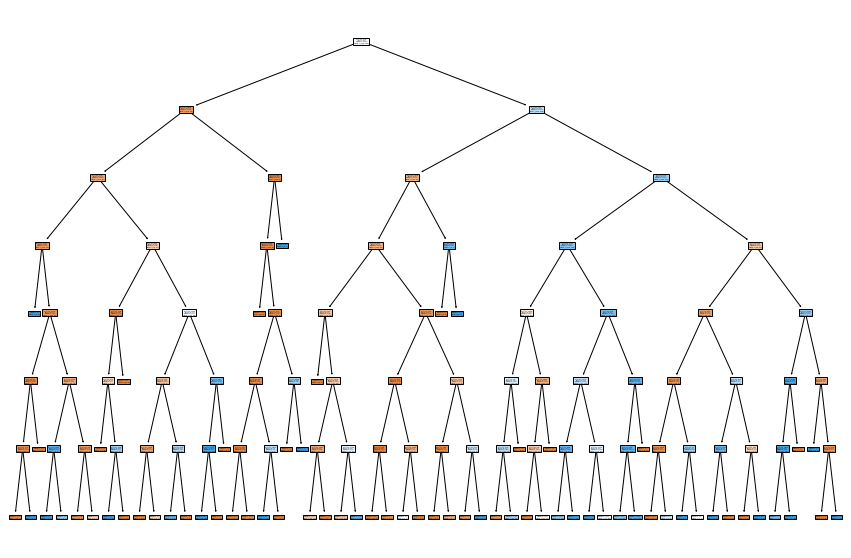

In [1264]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz

from subprocess import call
from IPython.display import Image
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=2)


parameters = [{
                'n_estimators': [200, 500,1000],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [4,5,6,7,8],
                'criterion' :['gini', 'entropy']
              }]

# parameters = [{'criterion':['gini', 'entropy'],
#                'max_depth':[20,40,50],
#                'max_features': [5, 6,,7],
#                "min_samples_split": range(1,100),
#                 "min_samples_leaf": range(1,30)}]

kf = KFold(n_splits=3,shuffle=True,random_state=2)
rfc=RandomForestClassifier(random_state=2)
grid = GridSearchCV(estimator = rfc, param_grid = parameters, cv = kf, n_jobs=-1)
grid.fit(x_train, y_train)

model = RandomForestClassifier(random_state=2)

randomforest_model = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],
                                            criterion = grid.best_params_['criterion'],
                                            max_depth = grid.best_params_['max_depth'],
                                           max_features=grid.best_params_['max_features'])
randomforest_model.fit(x_train, y_train)
randomforest_score_kfold = randomforest_model.score(x_test, y_test)

print("Best value of each hyperparameters: {}".format(grid.best_params_))
print("Ensemble(random forest) accuracy score: ", round(randomforest_score_kfold*100,2), "%")

plt.figure(figsize=(15,10))
tree.plot_tree(randomforest_model.estimators_[1], filled=True)

In [1308]:
# # the scaler - for standardisation
# np.round(x_train.describe(), 1)
from sklearn.preprocessing import RobustScaler
scaled_features = x_train.copy()
col_names = ['Height','Weight','Str_Acc_%','Str_Def_%',
             'TD_Acc_%','SLpM','SApM','TD_Avg','Sub_Avg','TD_Def_%']
features = scaled_features[col_names]
scaler = RobustScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
x_train_scaled = pd.DataFrame(scaled_features, columns=x_train.columns)
print(x_train_scaled)

scaled_features2 = x_test.copy()
col_names2 = ['Height','Weight','Str_Acc_%','Str_Def_%',
             'TD_Acc_%','SLpM','SApM','TD_Avg','Sub_Avg','TD_Def_%']
features2 = scaled_features2[col_names2]
features2 = scaler.transform(features2.values)
scaled_features2[col_names2] = features2
x_test_scaled = pd.DataFrame(scaled_features2, columns=x_test.columns)
print(x_test_scaled)


        Height  Weight      SLpM  Str_Acc_%      SApM  Str_Def_%    TD_Avg  \
969   0.769231   1.800  0.637824   0.357143 -0.848404   0.928571 -0.316832   
157   0.384615   2.625 -1.349815  -3.000000 -1.630319  -3.785714 -0.480198   
1858  0.384615   0.875  0.108776   0.071429  0.502660  -0.071429  0.480198   
707   0.384615  -0.625  0.316440   0.142857 -0.194149  -0.214286 -0.014851   
1446  0.769231   2.250  1.582200  -0.357143 -0.103723   0.214286 -0.123762   
...        ...     ...       ...        ...       ...        ...       ...   
1084 -0.384615  -0.375 -0.004944  -0.285714 -0.529255   0.928571 -0.237624   
444  -0.230769  -0.375 -0.647713  -0.642857 -0.422872   0.428571  0.356436   
687   0.384615   0.000  0.138443   0.000000 -0.172872   0.071429  1.257426   
1112  1.153846   0.375 -0.173053   0.642857 -0.023936  -0.928571  0.940594   
1621 -2.000000  -1.375 -0.217553   0.000000 -0.114362   0.000000  1.222772   

      TD_Acc_%  TD_Def_%   Sub_Avg  Stance_Orthodox  Stance_Sou

In [1266]:
np.round(x_train_scaled.describe(), 1)

,Height,Weight,SLpM,Str_Acc_%,SApM,Str_Def_%,TD_Avg,TD_Acc_%,TD_Def_%,Sub_Avg,Stance_Orthodox,Stance_Southpaw
count,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0
mean,-0.1,0.1,0.0,-0.2,0.1,-0.3,0.2,-0.0,-0.1,0.4,0.8,0.2
std,0.7,1.0,0.8,1.1,1.1,1.2,0.8,0.5,0.7,1.4,0.4,0.4
min,-2.2,-1.4,-1.3,-3.0,-1.6,-3.8,-0.5,-0.7,-1.3,-0.3,0.0,0.0
25%,-0.6,-0.6,-0.5,-0.5,-0.5,-0.6,-0.5,-0.7,-0.6,-0.3,1.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,0.4,0.4,0.5,0.5,0.5,0.4,0.5,0.3,0.4,0.7,1.0,0.0
max,2.2,15.0,8.5,4.1,10.8,3.4,6.5,1.3,1.1,24.0,1.0,1.0


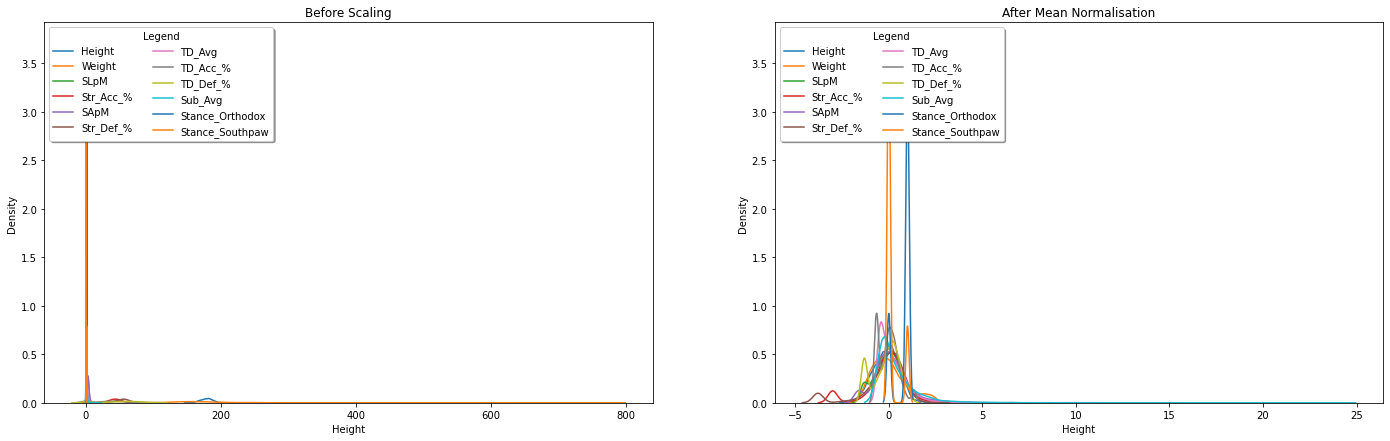

In [1267]:


def plotStandarization():
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(24, 7))
    # let's compare the variable distributions before and after scaling

    for (label, content) in x_train.iteritems():
        ax1.set_title('Before Scaling')
        sns.kdeplot(x_train[label], ax=ax1, label=label)
        leg = ax1.legend(loc="upper left", bbox_to_anchor=[0, 1],
                     ncol=2, shadow=True, title="Legend", fancybox=True)
    
    for (label, content) in x_train_scaled.iteritems():
        ax2.set_title('After Mean Normalisation')
        sns.kdeplot(x_train_scaled[label], ax=ax2, label=label)
        leg = ax2.legend(loc="upper left", bbox_to_anchor=[0, 1],
                     ncol=2, shadow=True, title="Legend", fancybox=True)

    plt.show() 
    
plotStandarization()



Best value of each hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 500}
Ensemble(random forest) accuracy score:  76.02 %


[Text(396.02197265625, 509.625, 'X[7] <= -0.41\ngini = 0.5\nsamples = 937\nvalue = [734, 754]'),
 Text(215.7890625, 441.675, 'X[8] <= 0.321\ngini = 0.366\nsamples = 267\nvalue = [339, 108]'),
 Text(153.66796875, 373.725, 'X[9] <= 1.278\ngini = 0.275\nsamples = 221\nvalue = [315, 62]'),
 Text(94.81640625, 305.775, 'X[1] <= 0.675\ngini = 0.226\nsamples = 198\nvalue = [295, 44]'),
 Text(52.3125, 237.825, 'X[3] <= -0.107\ngini = 0.168\nsamples = 132\nvalue = [206, 21]'),
 Text(26.15625, 169.875, 'X[0] <= 0.462\ngini = 0.076\nsamples = 86\nvalue = [145, 6]'),
 Text(13.078125, 101.92500000000001, 'X[3] <= -0.607\ngini = 0.043\nsamples = 77\nvalue = [132, 3]'),
 Text(6.5390625, 33.97500000000002, 'gini = 0.021\nsamples = 53\nvalue = [94, 1]'),
 Text(19.6171875, 33.97500000000002, 'gini = 0.095\nsamples = 24\nvalue = [38, 2]'),
 Text(39.234375, 101.92500000000001, 'X[0] <= 0.885\ngini = 0.305\nsamples = 9\nvalue = [13, 3]'),
 Text(32.6953125, 33.97500000000002, 'gini = 0.444\nsamples = 6\nvalu

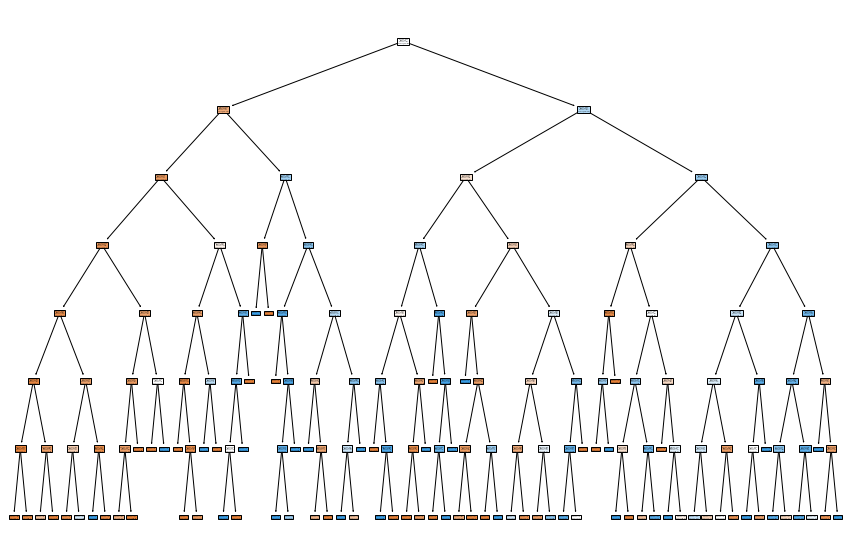

In [1268]:

grid = GridSearchCV(estimator = rfc, param_grid = parameters, cv = kf, n_jobs=-1)
grid.fit(x_train_scaled, y_train)

model = RandomForestClassifier(random_state=0)

randomforest_model = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],
                                            criterion = grid.best_params_['criterion'],
                                            max_depth = grid.best_params_['max_depth'],
                                           max_features=grid.best_params_['max_features'])
randomforest_model.fit(x_train_scaled, y_train)
randomforest_score_kfold = randomforest_model.score(x_test_scaled, y_test)

print("Best value of each hyperparameters: {}".format(grid.best_params_))
print("Ensemble(random forest) accuracy score: ", round(randomforest_score_kfold*100,2), "%")

plt.figure(figsize=(15,10))
randomforest_model = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],
                                            criterion = grid.best_params_['criterion'],
                                            max_depth = grid.best_params_['max_depth'],
                                           max_features=grid.best_params_['max_features'])
randomforest_model.fit(x_train_scaled, y_train)
randomforest_score_kfold = randomforest_model.score(x_test_scaled, y_test)tree.plot_tree(randomforest_model.estimators_[1], filled=True)

In [1309]:
randomforest_model = RandomForestClassifier(n_estimators=500,
                                            criterion = 'gini',
                                            max_depth = 7,
                                           max_features='auto')
randomforest_model.fit(x_train_scaled, y_train)
randomforest_score_kfold = randomforest_model.score(x_test_scaled, y_test)
df = pd.DataFrame()
cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy', 
        "Top 1 Feature Predictor",
        "Top 2 Feature Predictor",
        "Top 3 Feature Predictor",
        "Top 4 Feature Predictor",
        "Top 5 Feature Predictor",
       "Top 6 Feature Predictor"]

df.loc['Machine Learning Classification Method', 
       'Details'] = 'Random Forest Classifier'
df.loc['Train Accuracy', 'Details'] = randomforest_model.score(x_train_scaled, y_train) 
df.loc['Test Accuracy', 'Details'] = randomforest_model.score(x_test_scaled, y_test)
feature_importances = X.columns[np.argsort(randomforest_model.feature_importances_)][-6:]
df.loc['Top 1 Feature Predictor', 'Details'] = feature_importances[5]
df.loc['Top 2 Feature Predictor', 'Details'] = feature_importances[4]
df.loc['Top 3 Feature Predictor', 'Details'] = feature_importances[3]
df.loc['Top 4 Feature Predictor', 'Details'] = feature_importances[2]
df.loc['Top 5 Feature Predictor', 'Details'] = feature_importances[1]
df.loc['Top 6 Feature Predictor', 'Details'] = feature_importances[0]
display(df)

,Details
Machine Learning Classification Method,Random Forest Classifier
Train Accuracy,0.865591
Test Accuracy,0.750784
Top 1 Feature Predictor,SLpM
Top 2 Feature Predictor,TD_Acc_%
Top 3 Feature Predictor,Str_Def_%
Top 4 Feature Predictor,TD_Def_%
Top 5 Feature Predictor,SApM
Top 6 Feature Predictor,TD_Avg


In [1313]:
from sklearn.svm import SVC
parameters = [{
        'C': [0.1,1, 10],
        'gamma': [1,0.1,0.01,'scale'],
        'kernel': ['rbf', 'poly', 'sigmoid']
    
              }]
svc = SVC(probability = True, random_state=0)
grid = GridSearchCV(estimator = svc, param_grid = parameters, cv = kf, n_jobs=-1)
grid.fit(x_train_scaled, y_train)

model = SVC(random_state=0)

randomforest_model = SVC(C=grid.best_params_['C'],
                                            gamma = grid.best_params_['gamma'],
                                            kernel = grid.best_params_['kernel'],
                                             probability = True,
                                             random_state=0)
randomforest_model.fit(x_train_scaled, y_train)
randomforest_score_kfold = randomforest_model.score(x_test_scaled, y_test)

print("Best value of each hyperparameters: {}".format(grid.best_params_))
print("Ensemble(random forest) accuracy score: ", round(randomforest_score_kfold*100,2), "%")

Best value of each hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Ensemble(random forest) accuracy score:  76.02 %


In [1317]:
from sklearn import tree
parameters = [{
    "criterion": ['gini','entropy'],
    "max_depth": [7,8,9,10,11],  
              }]


treex = tree.DecisionTreeClassifier(random_state=0)
grid = GridSearchCV(estimator = treex, param_grid = parameters, cv = kf, n_jobs=-1)
grid.fit(x_train_scaled, y_train)

treex = tree.DecisionTreeClassifier(random_state=0)

randomforest_model = tree.DecisionTreeClassifier(criterion=grid.best_params_['criterion'],
                                            max_depth = grid.best_params_['max_depth'],
                                             random_state=0)
randomforest_model.fit(x_train_scaled, y_train)
randomforest_score_kfold = randomforest_model.score(x_test_scaled, y_test)

print("Best value of each hyperparameters: {}".format(grid.best_params_))
print("Ensemble(random forest) accuracy score: ", round(randomforest_score_kfold*100,2), "%")

Best value of each hyperparameters: {'criterion': 'gini', 'max_depth': 7}
Ensemble(random forest) accuracy score:  67.4 %


<h3>Qué modelo de ML/DL/DM usted aplicará a su proyecto para ser resuelto?</h3>
<p>
Los algoritmos que se utilizarán para el proyecto son: random forest, decision tree y SVM. Hay que evidenciar que el algoritmo central de la investigación sería SVM, ya que permite una segmentación de los datos de manera que establezcamos la distancia con el mayor margen posible.
</p>
<h3>Con qué modelos comparará ese modelo y por qué?</h2>
<p>
Los algoritmos por el cuál se lo compara, es porque el algoritmo como tal posee la técnica del Kernel, siendo útil para datos lineales. Por último usaremos Decision tree, que estableciendo que tiene una manera de percibir variables categóricas, puede percibir patrones no lineales, Random Forest que usando múltiples árboles aleatorios puede encontrar patrones en valores ocultos. El objetivo de plantear estos algoritmos en nuestra investigación es percibir si existen datos no lineales y valores ocultos, como se pudo estipular.

</p>
<h3>Cuáles son los hyperparameters que utilizará para cada modelo? Interprete los resultados.</h3>
<p>
Para el modelo de SVM se usará C, gamma, kernel; estableciendo que C, especificará la penalidad de error; gamma, determinando la importancia de puntos lejanos y cercanos; kernel, especificará el tipo de Kernel para disponer de un plano tridimensional. En el modelo decision tree se utilizará  criterion, determinando la ganancia de información; max_depth, la altura del árbol. Para el modelo de random forest se usará criterion y max_depth, establecidos anteriormente en el árbol de decisión, adicionalmente se especificará max_features, estableciendo el número máximo de características para llegar a una solución; n_estimators, que nos permite establecer el número de sub-arboles. Hay que concluir que se establece los parámetros de SVM para encontrar el mejor margen, ya que establecerá el tipo de kernel y su exactitud; decision tree y random forest, debido a que se deberá presentar una altura amplia ya que se presenta muchas características y específicamente random forest, el número de estimadores nos proporcionará predecir patrones ocultos.
</p>
<h3>Qué métricas utilizará para evaluar su modelo? Comente sobre cada métrica y qué valor espera.</h3>
<p>
La métrica principal que se usará para determinar la efectividad de nuestros modelos es la precisión, lo cuál nos indicará el porcentaje de predicciones correctas. Por ello se espera con la realización de todo el proceso,  una estimación del 75% a 80%.Adicionalmente para observar gráficamente la precisión del modelo se plantea usar la curva ROC.
</p>